# 1.Loading Data

In [5]:
#Importing Required Libraries


import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [6]:
# Loading data into dataframes

mat = pd.read_csv('matches.csv')

dil = pd.read_csv('deliveries.csv')

In [9]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [14]:
dil.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# 2. Familiarizing with Data

# Analysing 'Deliveries' Dataset:

In [12]:
# Shape of Data frame

dil.shape

(179078, 21)

In [43]:
# Listing the Features of Dataset
dil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [45]:
# Checking for null values

dil.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [157]:
# dropping columns with most null values
dil.drop(columns=["player_dismissed","dismissal_kind","fielder"], inplace = True)

In [159]:
dil.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs'],
      dtype='object')

In [51]:
# description of dataset

dil.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [52]:
dil.describe(include = 'all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,179078.000000,179078.000000,179078,179078,179078.000000,179078.000000,179078,179078,179078,179078.000000,...,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,8834,8834,6448
unique,NaN,NaN,15,15,NaN,NaN,516,511,405,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487,9,499
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,MS Dhoni
freq,NaN,NaN,22619,22517,NaN,NaN,4211,4173,3451,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,5348,159
mean,1802.252957,1.482952,NaN,NaN,10.162488,3.615587,NaN,NaN,NaN,0.000452,...,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,NaN,NaN,NaN
std,3472.322805,0.502074,NaN,NaN,5.677684,1.806966,NaN,NaN,NaN,0.021263,...,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


In [58]:
#unique value in dataset
dil.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

# Analysing 'Matches' Dataset:

In [66]:
# Shape of Data frame

mat.shape

(756, 18)

In [67]:
# Information about dataset

mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [69]:
# Checking for null values

mat.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [70]:
# description of dataset

mat.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [71]:
mat.describe(include = 'all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai,2011-04-17,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [72]:
# Unique values in Dataset

mat.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [86]:
#mat['city'].count()

list5 =list(mat['city'])

list5

['Hyderabad',
 'Pune',
 'Rajkot',
 'Indore',
 'Bangalore',
 'Hyderabad',
 'Mumbai',
 'Indore',
 'Pune',
 'Mumbai',
 'Kolkata',
 'Bangalore',
 'Rajkot',
 'Kolkata',
 'Delhi',
 'Mumbai',
 'Bangalore',
 'Delhi',
 'Hyderabad',
 'Rajkot',
 'Hyderabad',
 'Indore',
 'Kolkata',
 'Mumbai',
 'Pune',
 'Rajkot',
 'Kolkata',
 'Mumbai',
 'Pune',
 'Bangalore',
 'Kolkata',
 'Chandigarh',
 'Pune',
 'Rajkot',
 'Chandigarh',
 'Hyderabad',
 'Mumbai',
 'Pune',
 'Delhi',
 'Kolkata',
 'Delhi',
 'Bangalore',
 'Hyderabad',
 'Delhi',
 'Bangalore',
 'Chandigarh',
 'Hyderabad',
 'Chandigarh',
 'Kanpur',
 'Mumbai',
 'Delhi',
 'Kanpur',
 'Kolkata',
 'Pune',
 'Delhi',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Hyderabad',
 'Bangalore',
 'Chandigarh',
 'Delhi',
 'Mumbai',
 'Kolkata',
 'Jaipur',
 'Hyderabad',
 'Chennai',
 'Hyderabad',
 'Chandigarh',
 'Bangalore',
 'Chennai',
 'Mumbai',
 'Chandigarh',
 'Bangalore',
 'Kolkata',
 'Delhi',
 'Hyderabad',
 'Jaipur',
 'Chennai',
 'Hyderabad',
 'Chandigarh',
 'Mumbai',
 'Jaipur

In [84]:
list1  = list(mat['city'].unique())
list1

['Hyderabad',
 'Pune',
 'Rajkot',
 'Indore',
 'Bangalore',
 'Mumbai',
 'Kolkata',
 'Delhi',
 'Chandigarh',
 'Kanpur',
 'Jaipur',
 'Chennai',
 'Cape Town',
 'Port Elizabeth',
 'Durban',
 'Centurion',
 'East London',
 'Johannesburg',
 'Kimberley',
 'Bloemfontein',
 'Ahmedabad',
 'Cuttack',
 'Nagpur',
 'Dharamsala',
 'Kochi',
 'Visakhapatnam',
 'Raipur',
 'Ranchi',
 'Abu Dhabi',
 'Sharjah',
 nan,
 'Mohali',
 'Bengaluru']

In [89]:
dict1 = {}
for i in list1:
    dict1[i] = list5.count(i)
    
dict1

{'Hyderabad': 64,
 'Pune': 38,
 'Rajkot': 10,
 'Indore': 9,
 'Bangalore': 66,
 'Mumbai': 101,
 'Kolkata': 77,
 'Delhi': 74,
 'Chandigarh': 46,
 'Kanpur': 4,
 'Jaipur': 47,
 'Chennai': 57,
 'Cape Town': 7,
 'Port Elizabeth': 7,
 'Durban': 15,
 'Centurion': 12,
 'East London': 3,
 'Johannesburg': 8,
 'Kimberley': 3,
 'Bloemfontein': 2,
 'Ahmedabad': 12,
 'Cuttack': 7,
 'Nagpur': 3,
 'Dharamsala': 9,
 'Kochi': 5,
 'Visakhapatnam': 13,
 'Raipur': 6,
 'Ranchi': 7,
 'Abu Dhabi': 7,
 'Sharjah': 6,
 nan: 7,
 'Mohali': 10,
 'Bengaluru': 14}

In [93]:
mx1 = max(dict1.values())
mx1

for key,values in dict1.items():
    if values == mx1:
        print(key)

Mumbai


In [140]:
#mat['city'].count_values()

# city in most matches have been won

max1 = mat.groupby(mat.city.tolist(),as_index=True).size().sort_values(ascending = False)

max1.head(1)

Mumbai    101
dtype: int64

In [141]:
# Team that has most matches won


most_won = mat.groupby(mat.winner.tolist(),as_index=True).size().sort_values(ascending = False)

most_won.head(1)

Mumbai Indians    109
dtype: int64

In [143]:
# Player who has been won Man of the match most of times

most_won_mom = mat.groupby(mat.player_of_match .tolist(),as_index=True).size().sort_values(ascending = False)


print(most_won_mom)

most_won_mom.head(1)

CH Gayle           21
AB de Villiers     20
MS Dhoni           17
DA Warner          17
RG Sharma          17
                   ..
KMDN Kulasekara     1
KK Cooper           1
K Rabada            1
K Paul              1
Z Khan              1
Length: 226, dtype: int64


CH Gayle    21
dtype: int64

In [315]:
# Most frequent umpire1


most_frequent_umpire = mat.groupby(mat.umpire1.tolist(),as_index=True).size().sort_values(ascending = False)

print(most_frequent_umpire)

most_frequent_umpire.head(10)

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
SJA Taufel          1
SL Shastri          1
Sundaram Ravi       1
Ulhas Gandhe        1
A Nanda Kishore     1
Length: 62, dtype: int64


HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
BF Bowden          37
BR Doctrove        34
M Erasmus          32
RE Koertzen        20
Nitin Menon        20
dtype: int64

In [314]:
# Most frequent umpire


most_frequent_umpire2 = mat.groupby(mat.umpire2.tolist(),as_index=True).size().sort_values(ascending = False)

print(most_frequent_umpire2)

most_frequent_umpire2.head(10)

S Ravi                   57
C Shamshuddin            57
SJA Taufel               54
RJ Tucker                38
CK Nandan                36
                         ..
Kumar Dharmasena          1
Subroto Das               1
KN Ananthapadmanabhan     1
JD Cloete                 1
Ian Gould                 1
Length: 66, dtype: int64


S Ravi           57
C Shamshuddin    57
SJA Taufel       54
RJ Tucker        38
CK Nandan        36
RB Tiffin        30
VA Kulkarni      28
SK Tarapore      26
BNJ Oxenford     25
AM Saheba        23
dtype: int64

In [152]:
# Fill null values

mat.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [ ]:
# Dropping 'umpire3' column

mat.drop(columns=["umpire3"], inplace = True)

In [151]:
mat.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [153]:
# Fill null values

mat.city = mat.city.fillna("Not mentioned")
mat.umpire1 = mat.umpire1.fillna("No Umpire")
mat.umpire2 = mat.umpire2.fillna("No Umpire")
mat.winner = mat.winner.fillna("No result")
mat.player_of_match = mat.player_of_match.fillna("Not announced")


In [154]:
mat.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [156]:
# check duplicate values

duplicate = mat[mat.duplicated()]
 
print("Duplicate Rows :")

duplicate

Duplicate Rows :


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


# 3.Visualizing the data

# Q1.Number of matches in each season

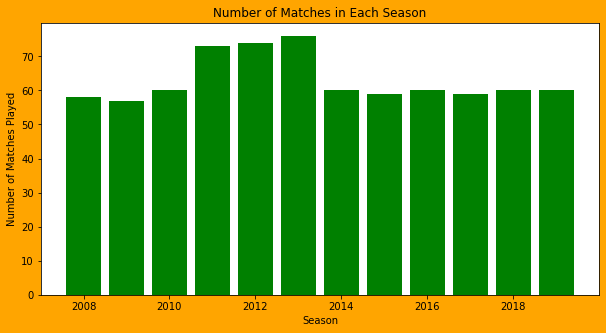

,2013,2012,2011,2010,2014,2016,2018,2019,2017,2015,2008,2009
season,76,74,73,60,60,60,60,60,59,59,58,57


In [316]:
season = mat['season'].value_counts()
plt.figure(figsize=(10,5), facecolor='orange')
plt.bar(x=season.index, height=season.values,color = 'green')
plt.title('Number of Matches in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches Played')
plt.show()
season = pd.DataFrame(season)
season.T

# 2.Number of Matches in each Venue

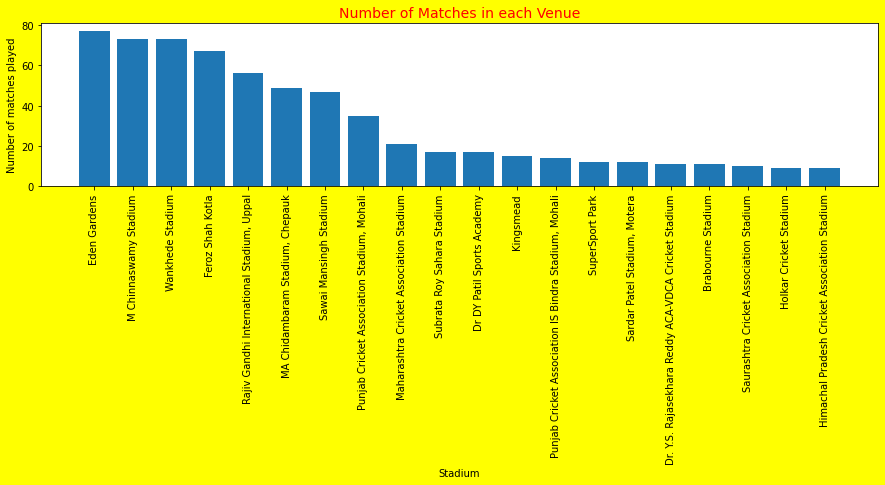

,Eden Gardens,M Chinnaswamy Stadium,Wankhede Stadium,Feroz Shah Kotla,"Rajiv Gandhi International Stadium, Uppal","MA Chidambaram Stadium, Chepauk",Sawai Mansingh Stadium,"Punjab Cricket Association Stadium, Mohali",Maharashtra Cricket Association Stadium,Subrata Roy Sahara Stadium,Dr DY Patil Sports Academy,Kingsmead,"Punjab Cricket Association IS Bindra Stadium, Mohali",SuperSport Park,"Sardar Patel Stadium, Motera",Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Brabourne Stadium,Saurashtra Cricket Association Stadium,Holkar Cricket Stadium,Himachal Pradesh Cricket Association Stadium
venue,77,73,73,67,56,49,47,35,21,17,17,15,14,12,12,11,11,10,9,9


In [319]:
venue = mat['venue'].value_counts()[:20]
plt.figure(figsize=(15,3), facecolor='yellow')
plt.bar(x=venue.index, height=venue.values)
plt.title('Number of Matches in each Venue',fontsize = 14,color = 'red',loc = 'center')
plt.xlabel('Stadium')
plt.ylabel('Number of matches played')
plt.xticks(rotation=90)
plt.show()
venue = pd.DataFrame(venue)
venue.T

# Q3. Top 10 awardee of player of match

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64


,CH Gayle,AB de Villiers,RG Sharma,MS Dhoni,DA Warner,YK Pathan,SR Watson,SK Raina,G Gambhir,MEK Hussey
player_of_match,21,20,17,17,17,16,15,14,13,12


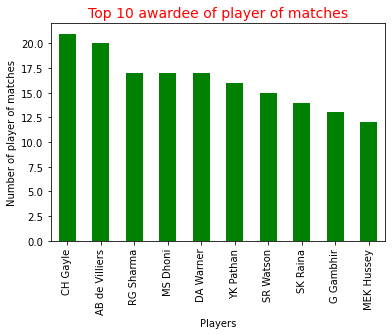

In [194]:

player_of_match = mat["player_of_match"].value_counts()[:10]
player_of_match.plot(kind="bar",color = 'green')
plt.title('Top 10 awardee of player of matches',fontsize = 14,color = 'red',loc = 'center')
plt.xlabel('Players')
plt.ylabel('Number of player of matches')
print(mat["player_of_match"].value_counts()[:10])
player_of_match = pd.DataFrame(player_of_match)
player_of_match.T

# Q4. Who won most number of matches

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
No result                        4
Name: winner, dtype: int64


,Mumbai Indians,Chennai Super Kings,Kolkata Knight Riders,Royal Challengers Bangalore,Kings XI Punjab,Rajasthan Royals,Delhi Daredevils,Sunrisers Hyderabad,Deccan Chargers,Gujarat Lions,Pune Warriors,Rising Pune Supergiant,Delhi Capitals,Kochi Tuskers Kerala,Rising Pune Supergiants,No result
winner,109,100,92,84,82,75,67,58,29,13,12,10,10,6,5,4


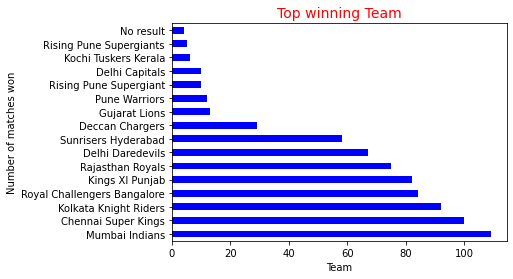

In [199]:
most_matches_winner = mat["winner"].value_counts()
most_matches_winner.plot(kind="barh",facecolor = 'blue' )
plt.title('Top winning Team',fontsize = 14,color = 'red',loc = 'center')
plt.xlabel('Team')
plt.ylabel('Number of matches won')
print(mat["winner"].value_counts())
most_matches_winner = pd.DataFrame(most_matches_winner)
most_matches_winner.T

# Q5. Number of matches played by each team

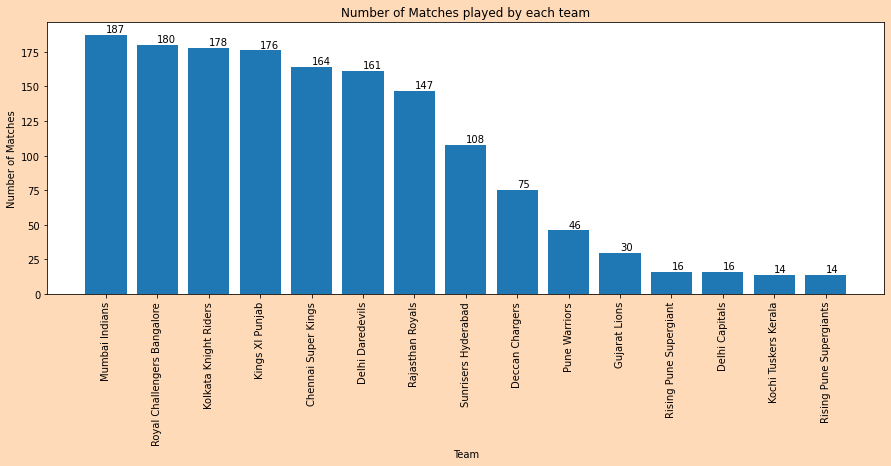

,Mumbai Indians,Royal Challengers Bangalore,Kolkata Knight Riders,Kings XI Punjab,Chennai Super Kings,Delhi Daredevils,Rajasthan Royals,Sunrisers Hyderabad,Deccan Chargers,Pune Warriors,Gujarat Lions,Rising Pune Supergiant,Delhi Capitals,Kochi Tuskers Kerala,Rising Pune Supergiants
0,187,180,178,176,164,161,147,108,75,46,30,16,16,14,14


In [304]:
numb_matches = pd.concat([mat['team1'], mat['team2']])

numb_matches = numb_matches.value_counts()

plt.figure(figsize=(15,5), facecolor='#FFDAB9')
plt.bar(x=numb_matches.index, height= numb_matches,)
plt.title('Number of Matches played by each team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)

for i,v in enumerate(numb_matches.values):
    plt.text(x=i, y=v+2, s=v)
    
plt.show() 

numb_matches = pd.DataFrame(numb_matches)
numb_matches.T

# Q6. Champion in Each Season

In [204]:
temp_df = mat.drop_duplicates('season', keep='last')
temp_df = temp_df[['season', 'winner']]
temp_df.sort_values('season',inplace=True)
temp_df.reset_index(inplace=True, drop=True)
temp_df

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


# Q7. Which Team most number of times in finals and max times champion team?

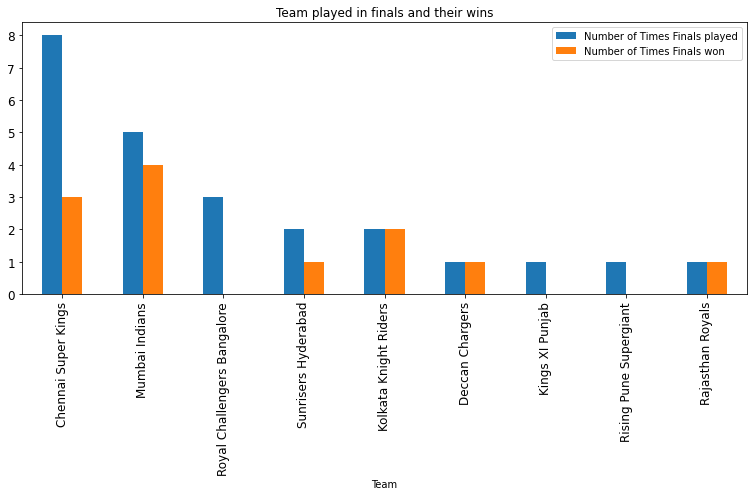

Team,Chennai Super Kings,Mumbai Indians,Royal Challengers Bangalore,Sunrisers Hyderabad,Kolkata Knight Riders,Deccan Chargers,Kings XI Punjab,Rising Pune Supergiant,Rajasthan Royals
Number of Times Finals played,8.0,5.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0
Number of Times Finals won,3.0,4.0,NaN,1.0,2.0,1.0,NaN,NaN,1.0


In [305]:
finals = mat.drop_duplicates('season', keep='last')
finals = finals[['season', 'team1', 'team2', 'winner', ]]

# Teams who reaches maximum number of finals
most_finals  =pd.concat([finals['team1'], finals['team2']])
most_finals = most_finals.value_counts().reset_index()
most_finals = pd.DataFrame(most_finals)
most_finals.columns = ['Team', 'final_count']

# Teams who won the final.
win_finals = finals['winner'].value_counts().reset_index()
win_finals = pd.DataFrame(win_finals,)

most_finals = most_finals.merge(win_finals, left_on='Team',right_on='index', how='outer')
most_finals.drop('index', axis=1,inplace=True)
most_finals.set_index('Team', drop=True, inplace=True)
most_finals.columns = ['Number of Times Finals played', 'Number of Times Finals won']
most_finals.plot(kind='bar', figsize=(13,5),fontsize=12, title='Team played in finals and their wins')
plt.show()
most_finals = pd.DataFrame(most_finals)
most_finals.T

# Q8. which team won Most matches won in particular season

,Mumbai Indians,Chennai Super Kings,Delhi Capitals,Kolkata Knight Riders,Kings XI Punjab,Sunrisers Hyderabad,Rajasthan Royals,Royal Challengers Bangalore,No result
winner,11,10,10,6,6,6,5,5,1


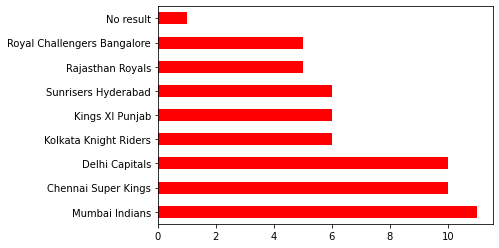

In [217]:
most_matches_winner_oneseason = mat.loc[mat.season == 2019, "winner"].value_counts()
most_matches_winner_oneseason.plot(kind="barh",color = 'red')
most_matches_winner_oneseason = pd.DataFrame(most_matches_winner_oneseason)
most_matches_winner_oneseason.T

# Q9. Toss decision whether Captain choose bat or ball.

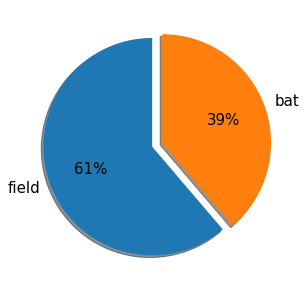

In [220]:
toss_decision = mat['toss_decision'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(labels=toss_decision.index, x=toss_decision.values, explode=[0.1,0],autopct='%.f%%',shadow=True,startangle=90, textprops={'fontsize':15})
plt.show()

field    463
bat      293
Name: toss_decision, dtype: int64

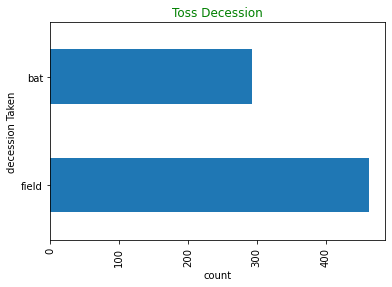

In [223]:
mat["toss_decision"].value_counts().plot(kind="barh")
plt.title('Toss Decession',color = 'green')
plt.xlabel('count')
plt.ylabel('decession Taken')
plt.xticks(rotation=90)
mat["toss_decision"].value_counts()

# Q10.  Is toss winner also match winner

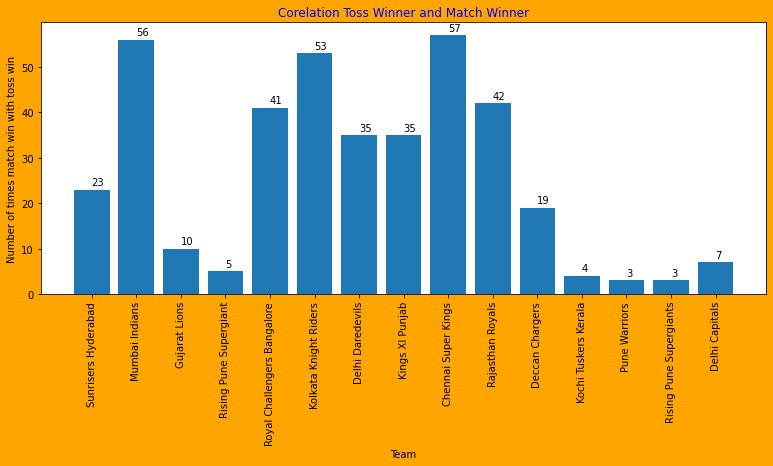

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,23,56,10,5,41,53,35,35,57,42,19,4,3,3,7


In [303]:
team = mat['team1'].unique()

toss_match_winner = []
for var in team:
    count = mat[(mat['toss_winner'] == var) & (mat['winner'] == var)]['id'].count()
    toss_match_winner.append(count)
    
plt.figure(figsize=(13,5), facecolor='orange')
plt.bar(x=team, height=toss_match_winner)
plt.xticks(rotation=90)
plt.title('Corelation Toss Winner and Match Winner',color = 'blue')
plt.xlabel('Team')
plt.ylabel('Number of times match win with toss win')

for i,v in enumerate(toss_match_winner):   
    plt.text(x=i, y=v+1, s=v)
plt.show()
toss_match_winner = pd.DataFrame(toss_match_winner)
toss_match_winner.T

# Q11. Which team won most number of matches with the margin of more than 50 runs?

,Chennai Super Kings,Mumbai Indians,Royal Challengers Bangalore,Rajasthan Royals,Delhi Daredevils,Kings XI Punjab,Kolkata Knight Riders,Deccan Chargers,Sunrisers Hyderabad,Rising Pune Supergiant
winner,13,10,7,6,4,4,3,3,2,1


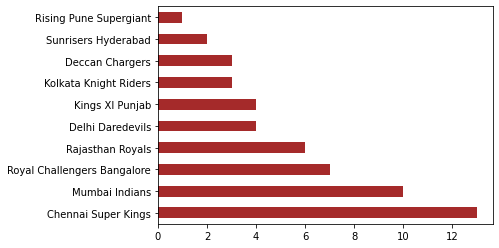

In [231]:
mat_won_grt_50runs = mat.loc[mat.win_by_runs > 50, "winner"].value_counts()
mat_won_grt_50runs.plot(kind="barh",color = 'brown')
mat_won_grt_50runs = pd.DataFrame(mat_won_grt_50runs)
mat_won_grt_50runs.T

# Q12. Which team won most number of matches with the margin of more than 5 wickets

,Kolkata Knight Riders,Kings XI Punjab,Royal Challengers Bangalore,Delhi Daredevils,Mumbai Indians,Rajasthan Royals,Chennai Super Kings,Sunrisers Hyderabad,Deccan Chargers,Gujarat Lions,Pune Warriors,Kochi Tuskers Kerala,Rising Pune Supergiant,Rising Pune Supergiants,Delhi Capitals
winner,38,35,32,31,29,27,27,17,9,7,4,4,3,2,2


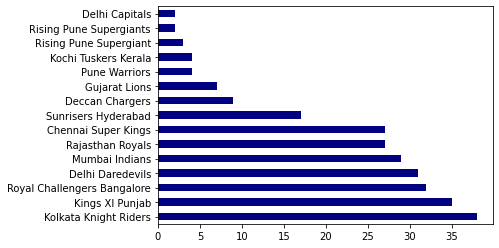

In [306]:
mat_won_grt_5wickets  = mat.loc[mat.win_by_wickets > 5, "winner"].value_counts()
mat_won_grt_5wickets.plot(kind="barh",color = 'navy')
mat_won_grt_5wickets = pd.DataFrame(mat_won_grt_5wickets)
mat_won_grt_5wickets.T

# Q13. Total runs scored across each season

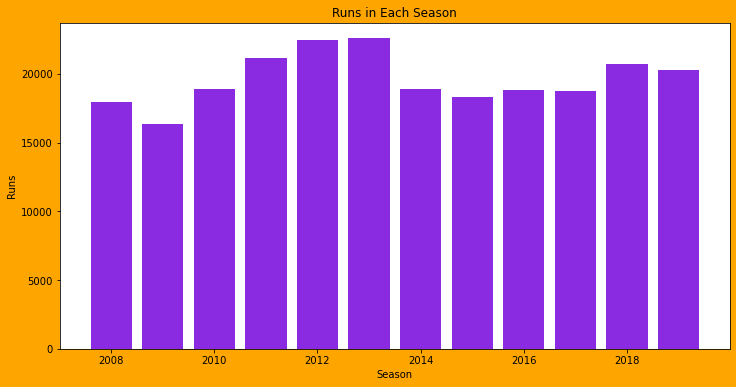

,0,1,2,3,4,5,6,7,8,9,10,11
0,18786,17937,16353,18883,21154,22453,22602,18931,18353,18862,20706,20270


In [240]:
season = mat['season'].unique()


runs_list = []
for var in season:
    new_df = mat[mat['season']==var]
    total_runs = 0
    for i in new_df['id'].values:
        run = dil[dil['match_id']==i]['total_runs'].sum()
        total_runs+=run
    runs_list.append(total_runs)    
    
plt.figure(figsize=(12,6), facecolor='orange')
plt.bar(x=season, height=runs_list,color = 'blueviolet')
plt.title('Runs in Each Season')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.show()
runs_list = pd.DataFrame(runs_list)
runs_list.T

# Q14. Total number of fours(4's) in each season:

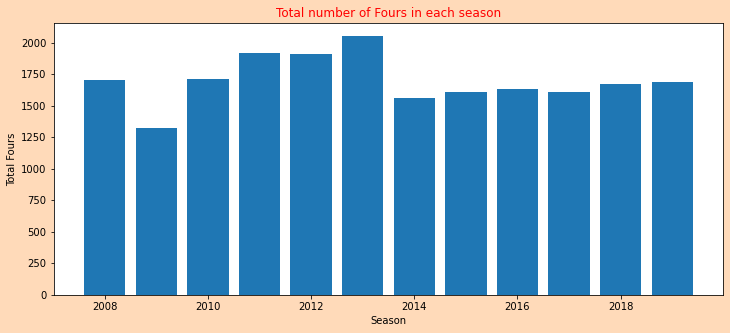

,0,1,2,3,4,5,6,7,8,9,10,11
0,1612,1703,1321,1709,1916,1911,2054,1563,1611,1633,1674,1685


In [320]:
season = mat['season'].unique()
fours_list = []
for var in season:
    new_df = mat[mat['season']==var]
    total_fours = 0
    for i in new_df['id'].values:
        temp_df = dil[dil['id']==i]
        fours = temp_df[temp_df['batsman_runs']==4]['batsman_runs'].count()
        total_fours+=fours
    fours_list.append(total_fours)
    
plt.figure(figsize=(12,5), facecolor='#FFDAB9')
plt.bar(x=season, height=fours_list, )
plt.title('Total number of Fours in each season',color = 'red')
plt.xlabel('Season')
plt.ylabel('Total Fours')
plt.show()
fours_list = pd.DataFrame(fours_list)
fours_list.T

# Q15. Total number of sixs(6's) in each season:

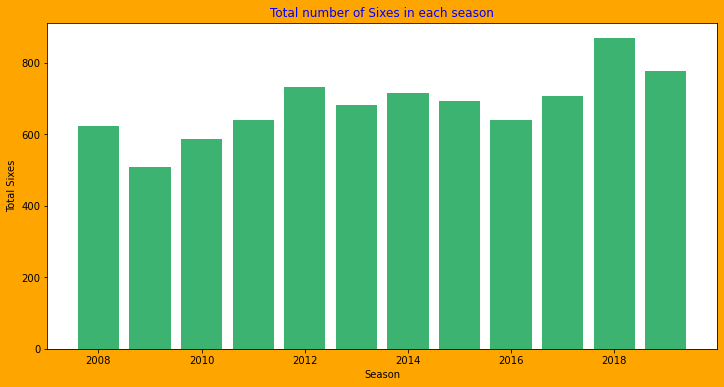

,0,1,2,3,4,5,6,7,8,9,10,11
0,706,623,508,587,639,733,681,715,692,639,869,778


In [246]:
season = mat['season'].unique()

sixes_list = []
for var in season:
    new_df = mat[mat['season']==var]
    total_sixes = 0
    for i in new_df['id'].values:
        temp_df = dil[dil['match_id']==i]
        sixes = temp_df[temp_df['batsman_runs']==6]['batsman_runs'].count()
        total_sixes+=sixes
    sixes_list.append(total_sixes)
    
plt.figure(figsize=(12,6), facecolor='orange' )
plt.bar(x=season, height=sixes_list,color = 'mediumseagreen' )
plt.title('Total number of Sixes in each season',color = 'blue')
plt.xlabel('Season')
plt.ylabel('Total Sixes')
plt.show()
sixes_list = pd.DataFrame(sixes_list)
sixes_list.T

# Q16.highest run scoring teams(200plus):

In [248]:
score_200plus =dil.groupby(['match_id','inning', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()
score_200plus.sort_values('total_runs',axis=0, inplace=True, ascending=False)
score_200plus = score_200plus[:20] 
score_200plus.drop(['match_id','inning'], axis=1, inplace=True)
score_200plus.columns = ['Batting Team','Bowling Team', '200+ runs']
score_200plus.reset_index(inplace=True, drop=True)
score_200plus

,Batting Team,Bowling Team,200+ runs
0,Royal Challengers Bangalore,Pune Warriors,263
1,Kolkata Knight Riders,Kings XI Punjab,250
2,Royal Challengers Bangalore,Gujarat Lions,248
3,Chennai Super Kings,Rajasthan Royals,246
4,Kolkata Knight Riders,Mumbai Indians,241
5,Chennai Super Kings,Kings XI Punjab,240
6,Royal Challengers Bangalore,Mumbai Indians,235
7,Sunrisers Hyderabad,Royal Challengers Bangalore,233
8,Sunrisers Hyderabad,Kings XI Punjab,232
9,Kings XI Punjab,Royal Challengers Bangalore,232


# Q17. Top 10 Batsman with most number of FOURS

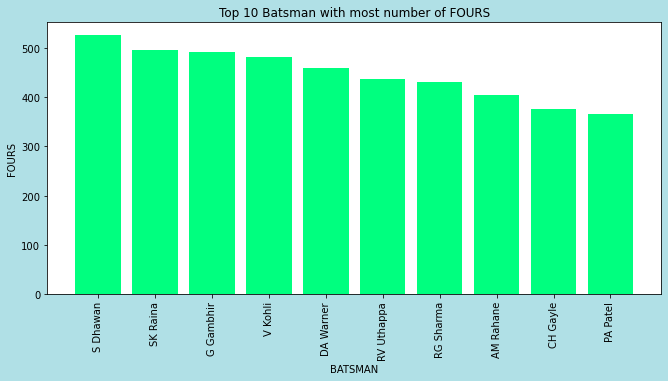

,0,1,2,3,4,5,6,7,8,9
Batsman,S Dhawan,SK Raina,G Gambhir,V Kohli,DA Warner,RV Uthappa,RG Sharma,AM Rahane,CH Gayle,PA Patel
Fours,526,495,492,482,459,436,431,405,376,366


In [307]:
batsman = dil['batsman'].unique()
count=0
def check_fours(x): # Counting number of fours
    global count
    if x==4:
        count+=1

batsman_fours = []       
for i in batsman:
    temp_df = dil[dil['batsman']==i]
    temp_df['batsman_runs'].apply(check_fours)
    batsman_fours.append(count)
    count=0
    
new_df = pd.DataFrame(data={'Batsman':batsman, 'Fours':batsman_fours})
new_df.sort_values('Fours', inplace=True,ascending=False,)
new_df.reset_index(drop=True, inplace=True)
new_df = new_df[:10]
plt.figure(figsize=(11,5), facecolor='#B0E0E6')
plt.bar(x=new_df['Batsman'], height=new_df['Fours'],color = 'springgreen')
plt.title('Top 10 Batsman with most number of FOURS')
plt.xlabel('BATSMAN')
plt.ylabel('FOURS')
plt.xticks(rotation=90)
plt.show()
new_df.T    

# Q18. Top 10 Batsman with most number of SIXES

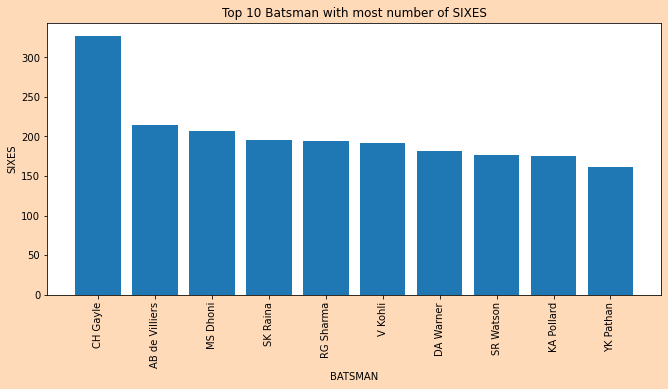

,0,1,2,3,4,5,6,7,8,9
Batsman,CH Gayle,AB de Villiers,MS Dhoni,SK Raina,RG Sharma,V Kohli,DA Warner,SR Watson,KA Pollard,YK Pathan
Sixes,327,214,207,195,194,191,181,177,175,161


In [308]:
batsman = dil['batsman'].unique()
count=0
def check_sixes(x):    
    global count
    if x==6:
        count+=1

batsman_sixes = []        
for var in batsman:
    temp_df = dil[dil['batsman']==var]
    temp_df['batsman_runs'].apply(check_sixes)
    batsman_sixes.append(count)
    count=0


new_df = pd.DataFrame(data={'Batsman':batsman, 'Sixes':batsman_sixes})
new_df.sort_values('Sixes', inplace=True,ascending=False,)
new_df.reset_index(drop=True, inplace=True)
new_df = new_df[:10]
plt.figure(figsize=(11,5), facecolor='#FFDAB9')
plt.bar(x=new_df['Batsman'], height=new_df['Sixes'])
plt.title('Top 10 Batsman with most number of SIXES')
plt.xlabel('BATSMAN')
plt.ylabel('SIXES')
plt.xticks(rotation=90)
plt.show()
new_df.T

# Q19. Top 10 Individuals Scores

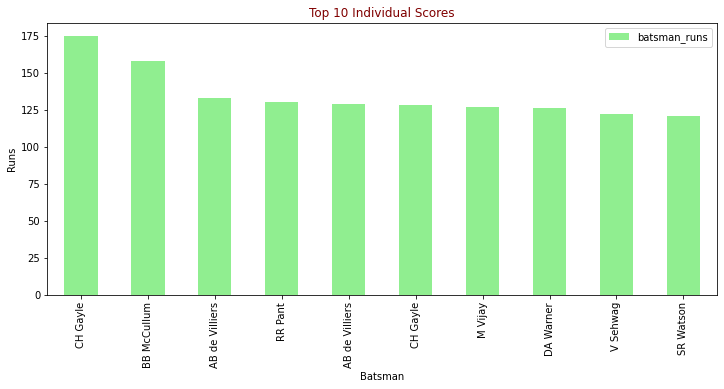

batsman,CH Gayle,BB McCullum,AB de Villiers,RR Pant,AB de Villiers,CH Gayle,M Vijay,DA Warner,V Sehwag,SR Watson
batsman_runs,175,158,133,130,129,128,127,126,122,121


In [313]:
individual_score = dil.groupby(['id','batsman',])['batsman_runs'].sum().reset_index()
individual_score.sort_values('batsman_runs',axis=0, inplace=True,ascending=False)

# Top 10 highest runs by Individual.
individual_score = individual_score[:10]

individual_score.drop('id',inplace=True,axis=1)
individual_score.set_index('batsman',inplace=True)

individual_score.plot(kind='bar', figsize=(12,5), color = 'lightgreen')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.title('Top 10 Individual Scores',color = 'maroon')
plt.show()
individual_score.T

# Q20. Orange cap holders in different seasons:

In [258]:
season = mat['season'].unique()

# Getting total runs of Individual from each season by check id from matches dataset in deliveries dataset.
name,runs = [],[]
for var in season:
    new_df1 = mat[mat['season']==var]
    temp_df1 = dil[dil['match_id'].isin(new_df1['id'].values)]
    temp_df1 = temp_df1.groupby('batsman')['batsman_runs'].sum().reset_index()
    temp_df1.sort_values('batsman_runs', inplace=True,ascending=False)
    temp_df1 = temp_df1.iloc[0,:]
    name.append(temp_df1['batsman'])
    runs.append(temp_df1['batsman_runs'])

orangecap_df = pd.DataFrame(data={'Season':season, 'Player':name, 'Total Runs':runs})
orangecap_df.sort_values('Season')

,Season,Player,Total Runs
1,2008,SE Marsh,616
2,2009,ML Hayden,572
3,2010,SR Tendulkar,618
4,2011,CH Gayle,608
5,2012,CH Gayle,733
6,2013,MEK Hussey,733
7,2014,RV Uthappa,660
8,2015,DA Warner,562
9,2016,V Kohli,973
0,2017,DA Warner,641


# Q21.  Top 10 Bowler who bowled Maximum balls in IPL

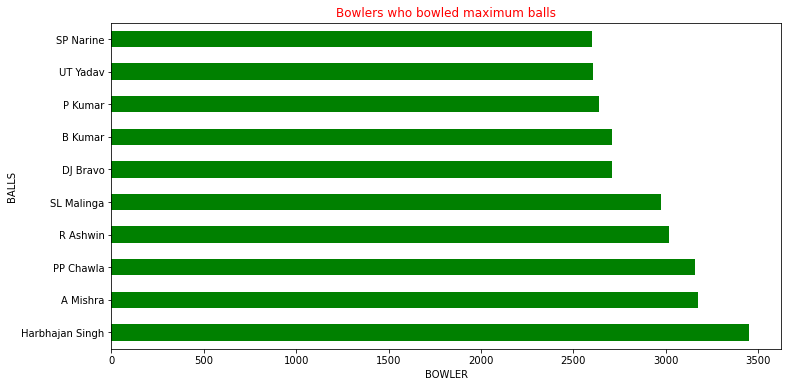

,Harbhajan Singh,A Mishra,PP Chawla,R Ashwin,SL Malinga,DJ Bravo,B Kumar,P Kumar,UT Yadav,SP Narine
bowler,3451,3172,3157,3016,2974,2711,2707,2637,2605,2600


In [265]:
balls = dil['bowler'].value_counts()[:10]
balls.plot(kind='barh', figsize=(12,6),color = 'green')
plt.title ('Bowlers who bowled maximum balls',color = 'red')
plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()
balls = pd.DataFrame(balls)
balls.T

# Q22. Top 10 Bowlers with maximum number of Dot Balls

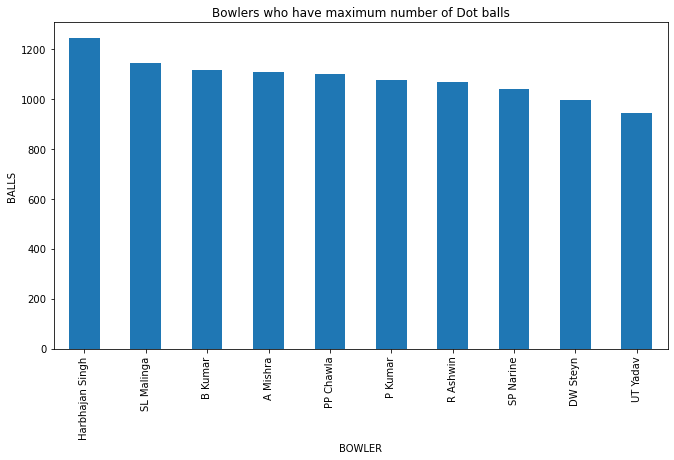

,bowler
Harbhajan Singh,1244
SL Malinga,1144
B Kumar,1116
A Mishra,1108
PP Chawla,1100
P Kumar,1075
R Ashwin,1067
SP Narine,1038
DW Steyn,996
UT Yadav,942


In [267]:
dot_ball = dil[dil['total_runs']==0]
dot_ball = dot_ball['bowler'].value_counts()[:10]
dot_ball.plot(kind='bar', figsize=(11,6), title='Bowlers who have maximum number of Dot balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

dot_ball = pd.DataFrame(dot_ball)
dot_ball

# Q23.Top 10 Bowlers with maximum number of extras

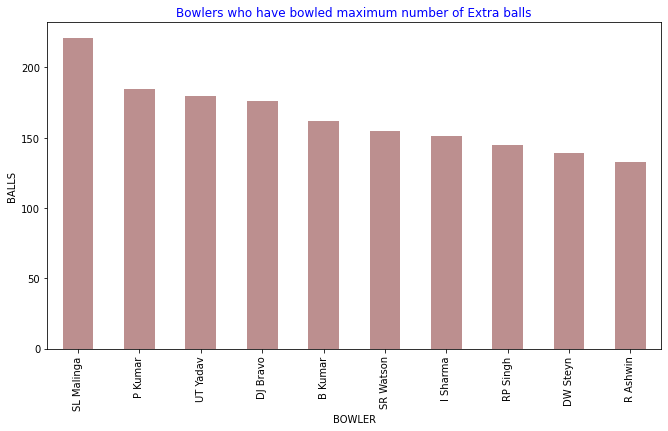

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [270]:
extra_runs = dil[dil['extra_runs']!=0]['bowler'].value_counts()[:10]
extra_runs.plot(kind='bar', figsize=(11,6),color = 'rosybrown')
plt. title('Bowlers who have bowled maximum number of Extra balls',color = 'blue')
plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

extra_runs = pd.DataFrame(extra_runs)
extra_runs.T

# 4.Data Analysis:

# 4.1.1 Merging the two data sets into a new data set and readind it (Join on match id)

In [283]:
dil.columns

Index(['id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs'],
      dtype='object')

In [ ]:
df. rename(columns = {'match_id':'id'}, inplace = True)

In [289]:
ipl = pd.merge(mat,dil,how ='right',on ='id')

In [290]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               179078 non-null  int64 
 1   season           179078 non-null  int64 
 2   city             179078 non-null  object
 3   date             179078 non-null  object
 4   team1            179078 non-null  object
 5   team2            179078 non-null  object
 6   toss_winner      179078 non-null  object
 7   toss_decision    179078 non-null  object
 8   result           179078 non-null  object
 9   dl_applied       179078 non-null  int64 
 10  winner           179078 non-null  object
 11  win_by_runs      179078 non-null  int64 
 12  win_by_wickets   179078 non-null  int64 
 13  player_of_match  179078 non-null  object
 14  venue            179078 non-null  object
 15  umpire1          179078 non-null  object
 16  umpire2          179078 non-null  object
 17  inning    

In [291]:
# Check Shape
ipl.shape

(179078, 34)

In [292]:
# Check Duplicate values in new data set

duplicate1 = ipl[ipl.duplicated()]
 
print("Duplicate Rows :")

duplicate1


Duplicate Rows :


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
52178,221,2010,Mumbai,2010-04-13,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,normal,0,...,PJ Sangwan,0,0,0,0,0,0,1,0,1
162805,7946,2018,Jaipur,19/05/18,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,...,UT Yadav,0,0,0,0,0,0,4,0,4
162806,7946,2018,Jaipur,19/05/18,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,...,UT Yadav,0,0,0,0,0,0,1,0,1
162870,7946,2018,Jaipur,19/05/18,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,...,YS Chahal,0,0,0,0,0,0,0,0,0
162964,7946,2018,Jaipur,19/05/18,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,...,I Sodhi,0,0,0,0,0,0,0,0,0
166610,11144,2019,Hyderabad,29/03/19,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,bat,normal,0,...,J Archer,0,0,0,0,0,0,4,0,4
167990,11150,2019,Jaipur,02/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,...,K Gowtham,0,0,0,0,0,0,1,0,1
168080,11150,2019,Jaipur,02/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,...,N Saini,0,0,0,0,0,0,0,0,0
169404,11311,2019,Bengaluru,07/04/19,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,...,I Sharma,0,0,0,0,0,0,0,0,0
170110,11314,2019,Chennai,09/04/19,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,...,DL Chahar,0,0,0,0,0,0,0,0,0
